In [6]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
from sklearn import svm
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import time
import bovo.svm as bsvm



In [19]:
cv = KFold(n_splits=4)
svc = SVC(kernel="linear", C=1e-2)
# svc = SVC(C=5336.699231206313, gamma=4.328761281083062e-05)
# svc = RandomForestClassifier()

def lasso_evaluation (target_name, loss_threshold_percent=None, loss_threshold=None):
    if loss_threshold_percent is not None:
        X, y, columns = bsvm.load_with_threshold(target_name, loss_threshold_percent/100)
        columns_selector = bsvm.select_lasso_features (cv, X, y)
        best_variables = list(columns[columns_selector])
        print("Best variables ({}) : {}".format(len(best_variables), best_variables))

        sub_x = X.T[columns_selector].T
        accuracy, std = bsvm.calc_confusion_matrix(svc, cv, "{}%".format(loss_threshold_percent), sub_x, y)
        base_accuracy = max(np.mean(y), 1-np.mean(y))
        plt.title("Confusion Matrix for {} | Base accuracy = {:.2f} | Actual accuracy = {:.2f}(±{:.4f})".format(target_name, base_accuracy, accuracy, std))
        plt.savefig("/home/oscar/bovo/results/imgs/svm/{}_{}.png".format(target_name, loss_threshold_percent))

    if loss_threshold is not None:
        X, y, columns = bsvm.load_with_threshold(target_name, loss_threshold)
        columns_selector = bsvm.select_lasso_features (cv, X, y)
        best_variables = list(columns[columns_selector])
        print("Best variables ({}) : {}".format(len(best_variables), best_variables))

        sub_x = X.T[columns_selector].T
        accuracy, std = bsvm.calc_confusion_matrix(svc, cv, "{:.2f}".format(loss_threshold), sub_x, y)
        base_accuracy = max(np.mean(y), 1-np.mean(y))
        plt.title("Confusion Matrix for {} | Base accuracy = {:.2f} | Actual accuracy = {:.2f}(±{:.4f})".format(target_name, base_accuracy, accuracy, std))
        plt.savefig("/home/oscar/bovo/results/imgs/svm/{}_{:.2f}.png".format(target_name, loss_threshold))

    plt.show()

Best variables (6) : ['Airesecteur1', 'Airesecteur2', 'Airesecteur4', 'Airesecteur6', 'Airesecteur7', 'Airesecteur8']


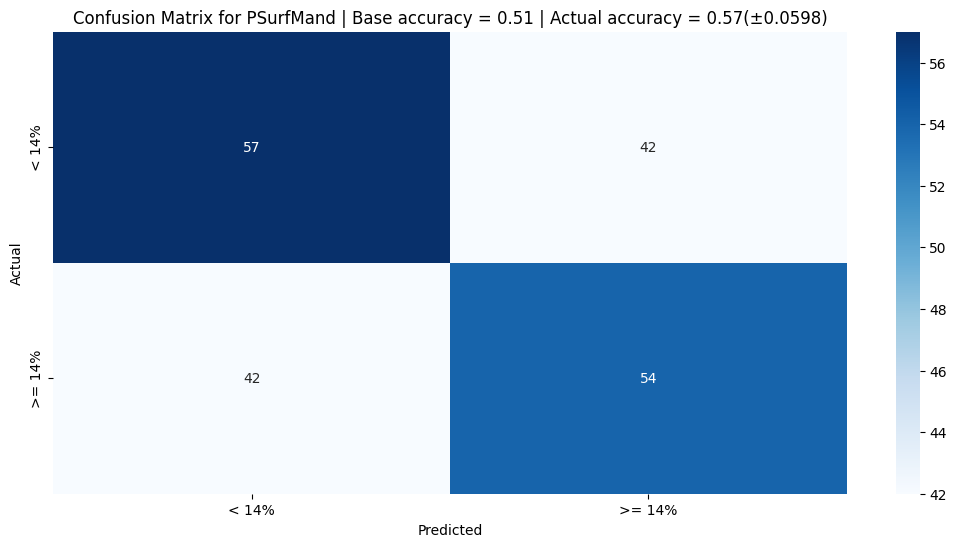

Best variables (6) : ['Airesecteur2', 'Airesecteur3', 'Airesecteur4', 'Airesecteur6', 'Airesecteur7', 'Airesecteur8']


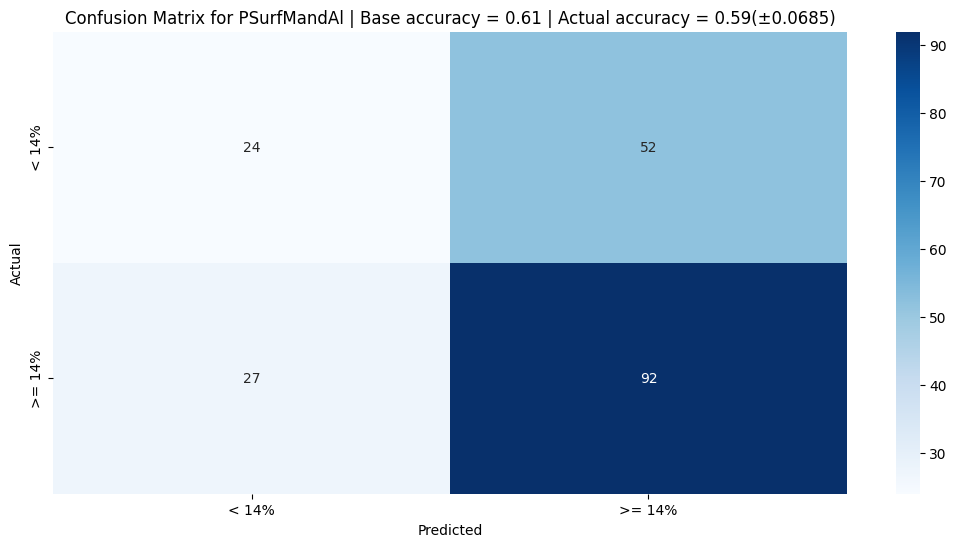

Best variables (2) : ['Airesecteur6', 'Airesecteur8']


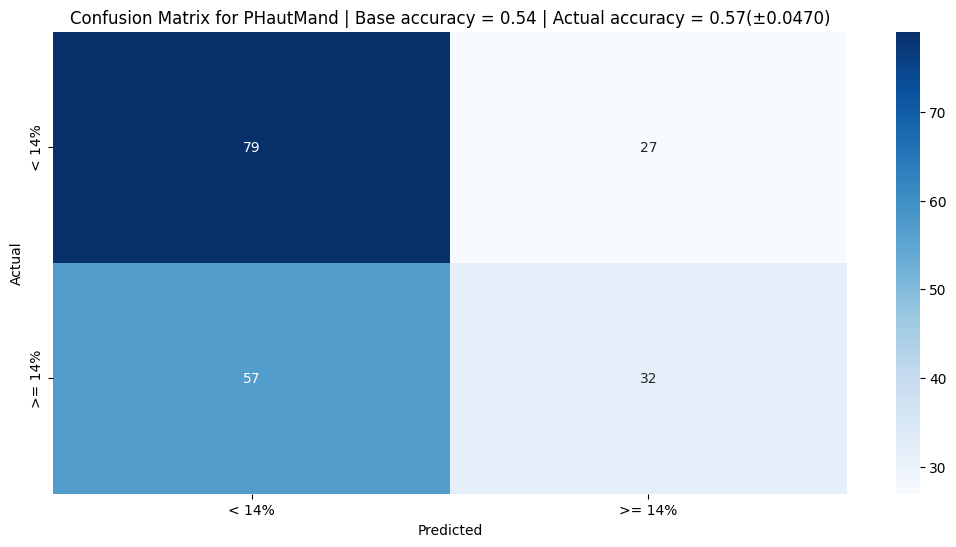

Best variables (3) : ['Airesecteur2', 'Airesecteur6', 'Airesecteur8']


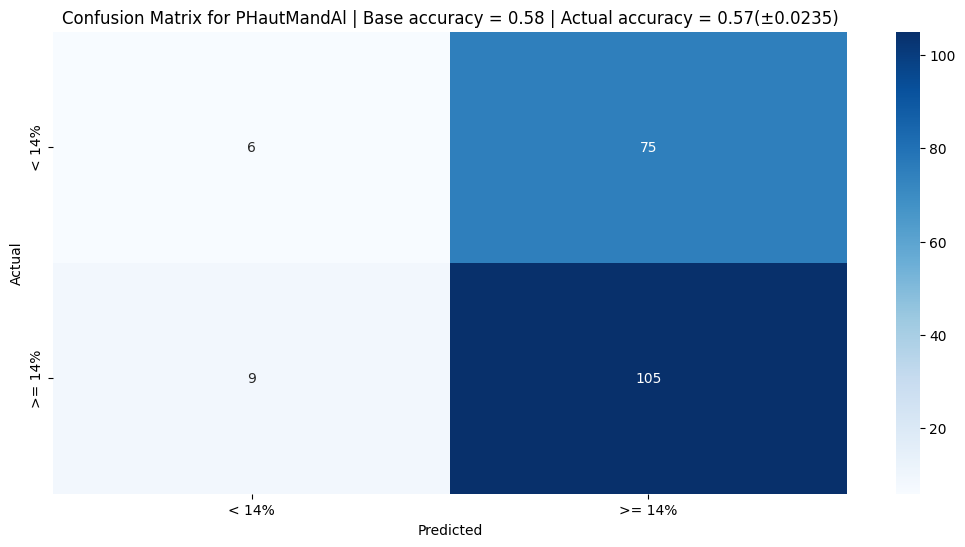

In [20]:
lasso_evaluation ("PSurfMand", loss_threshold_percent=14)
lasso_evaluation ("PSurfMandAl", loss_threshold_percent=14)
lasso_evaluation ("PHautMand", loss_threshold_percent=14)
lasso_evaluation ("PHautMandAl", loss_threshold_percent=14)


Best variables (6) : ['Airesecteur2', 'Airesecteur3', 'Airesecteur4', 'Airesecteur6', 'Airesecteur7', 'Airesecteur8']


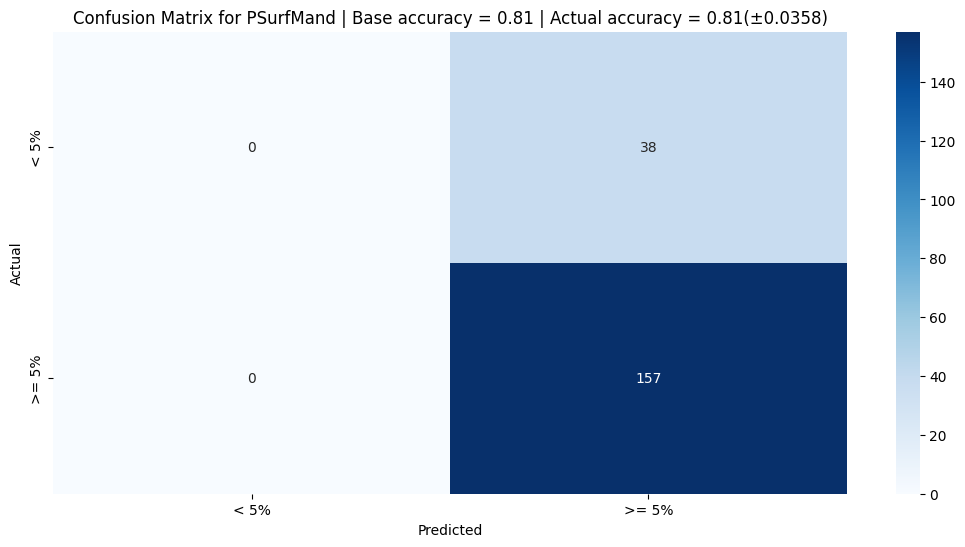

/home/oscar/bovo/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00224991610557268, tolerance: 0.002136986301369863
  model = cd_fast.enet_coordinate_descent_gram(
/home/oscar/bovo/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0023272340973221617, tolerance: 0.002136986301369863
  model = cd_fast.enet_coordinate_descent_gram(
/home/oscar/bovo/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002370974741207732, tolerance: 0.002136986301369863
  model = cd_fast.enet_coordinate_descent_gram(


Best variables (4) : ['Airesecteur2', 'Airesecteur3', 'Airesecteur6', 'Airesecteur8']


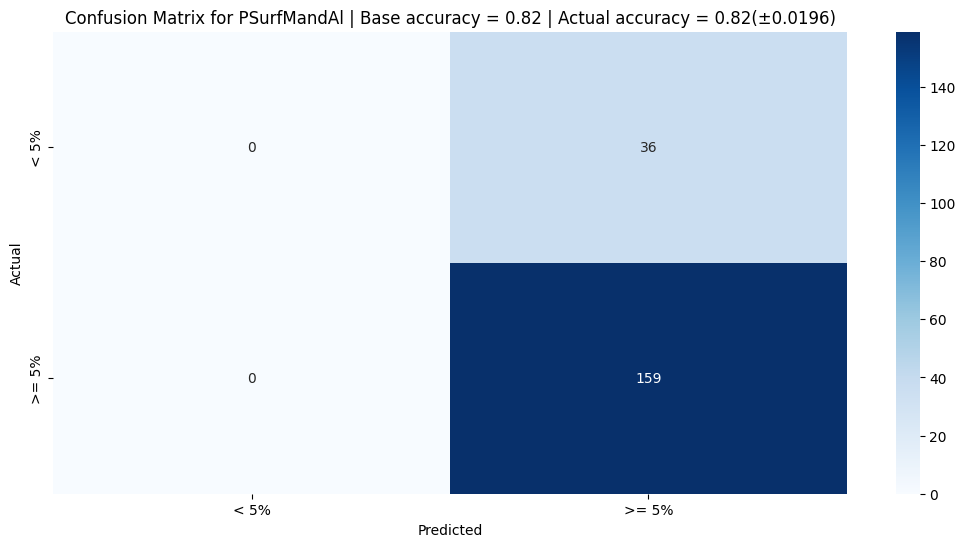

Best variables (4) : ['Airesecteur4', 'Airesecteur5', 'Airesecteur6', 'Airesecteur8']


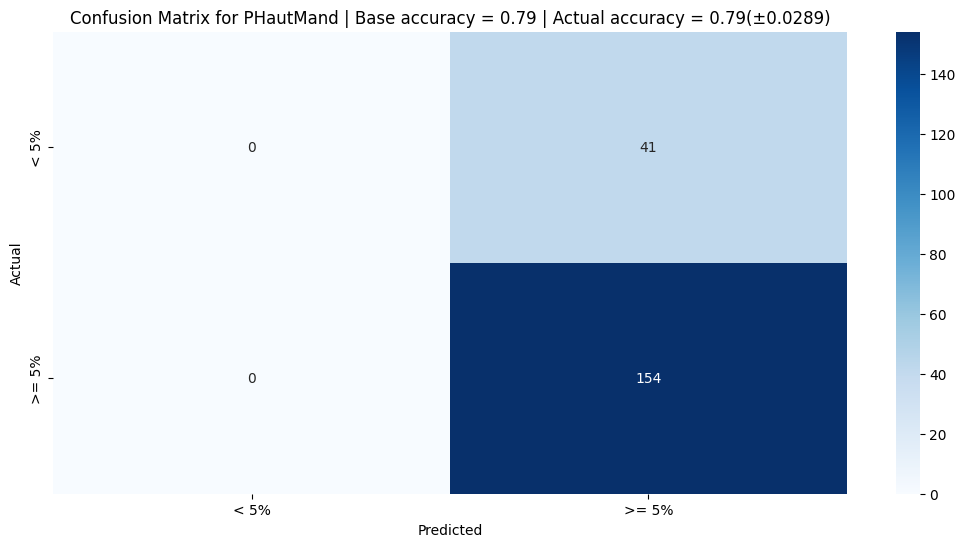

Best variables (3) : ['Airesecteur2', 'Airesecteur4', 'Airesecteur6']


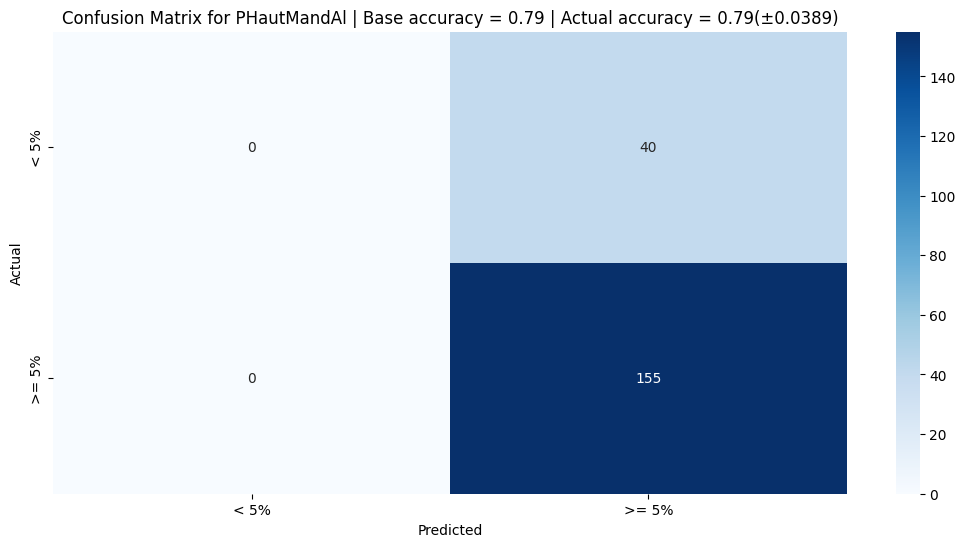

In [21]:
lasso_evaluation ("PSurfMand", loss_threshold_percent=5)
lasso_evaluation ("PSurfMandAl", loss_threshold_percent=5)
lasso_evaluation ("PHautMand", loss_threshold_percent=5)
lasso_evaluation ("PHautMandAl", loss_threshold_percent=5)


Best variables (2) : ['Airesecteur2', 'Airesecteur8']


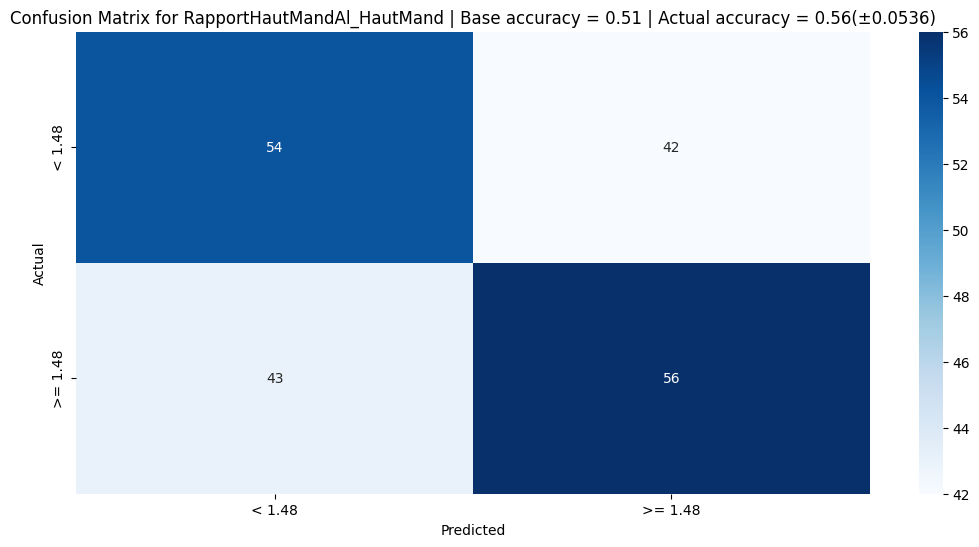

In [22]:
x, y = bsvm.load_data("RapportHautMandAl_HautMand")
lasso_evaluation ("RapportHautMandAl_HautMand", loss_threshold=np.median(y))